# Series

相对于np.array的固定整型索引，Series可以自定义索引

# DataFrame

相较于Numpy使用整型下标，它可使用自定义索引和列名，即Index和Columns

- describe 数据各种描述性统计值
- unique 数据独立值列表
- value_count 各个值计数
- hist 直接绘制直方图
- plot 对matplotlib进行了简单封装


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [7]:
# 创建日期，从'20171026'开始，6天
dates = pd.date_range('20171026', periods=6)
dates

DatetimeIndex(['2017-10-26', '2017-10-27', '2017-10-28', '2017-10-29',
               '2017-10-30', '2017-10-31'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=tuple('ABCD'))
df

,A,B,C,D
2017-10-26,0.232748,-0.045571,-0.025702,-0.291828
2017-10-27,1.160497,0.231349,-2.502108,0.463124
2017-10-28,2.128304,-0.004946,-0.039373,-0.859386
2017-10-29,-1.110714,2.423362,-0.401902,1.600937
2017-10-30,-0.751810,-0.422041,-1.032300,-0.704833
2017-10-31,-0.065249,1.540292,1.982090,0.375051


In [10]:
df2 = pd.DataFrame({
    'A': 1.,
    'B': pd.Timestamp('20171026'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3]*4, dtype='int32'),
    'E': pd.Categorical(['test','train','test','train']), # 类别类型的数据
    'F': 'foo'
})
df2

,A,B,C,D,E,F
0,1.0,2017-10-26,1.0,3,test,foo
1,1.0,2017-10-26,1.0,3,train,foo
2,1.0,2017-10-26,1.0,3,test,foo
3,1.0,2017-10-26,1.0,3,train,foo


In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [12]:
df2.C

0    1.0
1    1.0
2    1.0
3    1.0
Name: C, dtype: float32

# 查看数据

In [13]:
df.head()

,A,B,C,D
2017-10-26,0.232748,-0.045571,-0.025702,-0.291828
2017-10-27,1.160497,0.231349,-2.502108,0.463124
2017-10-28,2.128304,-0.004946,-0.039373,-0.859386
2017-10-29,-1.110714,2.423362,-0.401902,1.600937
2017-10-30,-0.751810,-0.422041,-1.032300,-0.704833


In [14]:
df.head(1)

,A,B,C,D
2017-10-26,0.232748,-0.045571,-0.025702,-0.291828


In [15]:
df.tail(3)

,A,B,C,D
2017-10-29,-1.110714,2.423362,-0.401902,1.600937
2017-10-30,-0.751810,-0.422041,-1.032300,-0.704833
2017-10-31,-0.065249,1.540292,1.982090,0.375051


In [16]:
df.index

DatetimeIndex(['2017-10-26', '2017-10-27', '2017-10-28', '2017-10-29',
               '2017-10-30', '2017-10-31'],
              dtype='datetime64[ns]', freq='D')

In [18]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [19]:
df.values

array([[ 0.23274837, -0.04557109, -0.02570227, -0.29182795],
       [ 1.16049699,  0.23134908, -2.50210818,  0.46312374],
       [ 2.12830355, -0.00494574, -0.03937331, -0.85938631],
       [-1.11071439,  2.42336153, -0.40190229,  1.6009375 ],
       [-0.75180982, -0.42204075, -1.03230027, -0.70483334],
       [-0.06524869,  1.54029245,  1.9820901 ,  0.37505137]])

In [20]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.265629,0.620408,-0.336549,0.097177
std,1.209166,1.110810,1.465538,0.914547
min,-1.110714,-0.422041,-2.502108,-0.859386
25%,-0.580170,-0.035415,-0.874701,-0.601582
50%,0.083750,0.113202,-0.220638,0.041612
75%,0.928560,1.213057,-0.029120,0.441106
max,2.128304,2.423362,1.982090,1.600937


In [21]:
df.T

,2017-10-26,2017-10-27,2017-10-28,2017-10-29,2017-10-30,2017-10-31
A,0.232748,1.160497,2.128304,-1.110714,-0.751810,-0.065249
B,-0.045571,0.231349,-0.004946,2.423362,-0.422041,1.540292
C,-0.025702,-2.502108,-0.039373,-0.401902,-1.032300,1.982090
D,-0.291828,0.463124,-0.859386,1.600937,-0.704833,0.375051


In [22]:
df.sort_index(axis=1, ascending= False)

,D,C,B,A
2017-10-26,-0.291828,-0.025702,-0.045571,0.232748
2017-10-27,0.463124,-2.502108,0.231349,1.160497
2017-10-28,-0.859386,-0.039373,-0.004946,2.128304
2017-10-29,1.600937,-0.401902,2.423362,-1.110714
2017-10-30,-0.704833,-1.032300,-0.422041,-0.751810
2017-10-31,0.375051,1.982090,1.540292,-0.065249


In [24]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2017-10-31,-0.065249,1.540292,1.982090,0.375051
2017-10-30,-0.751810,-0.422041,-1.032300,-0.704833
2017-10-29,-1.110714,2.423362,-0.401902,1.600937
2017-10-28,2.128304,-0.004946,-0.039373,-0.859386
2017-10-27,1.160497,0.231349,-2.502108,0.463124
2017-10-26,0.232748,-0.045571,-0.025702,-0.291828


In [23]:
df.sort_values(by='B')

,A,B,C,D
2017-10-30,-0.751810,-0.422041,-1.032300,-0.704833
2017-10-26,0.232748,-0.045571,-0.025702,-0.291828
2017-10-28,2.128304,-0.004946,-0.039373,-0.859386
2017-10-27,1.160497,0.231349,-2.502108,0.463124
2017-10-31,-0.065249,1.540292,1.982090,0.375051
2017-10-29,-1.110714,2.423362,-0.401902,1.600937


# 选择数据

- 选择列 df[col]    Series
- 选择行 df.loc[label]    Series
- 选择列、行    df.loc[index,column]    DataFrame
- 使用位置选择行。  df.iloc[loc]   Series  # 这里iloc是整型数据，和传统一样
- 选择行列.   df.iloc[v_loc, h_loc]
- 行切片.   df[5:10], df[index1:index2]  # 中括号内传入切片时，返回的是行
- 使用布尔向量选择行   df[bool_vec] 

# 访问数据

In [25]:
df['A'] #获取列

2017-10-26    0.232748
2017-10-27    1.160497
2017-10-28    2.128304
2017-10-29   -1.110714
2017-10-30   -0.751810
2017-10-31   -0.065249
Freq: D, Name: A, dtype: float64

In [26]:
df[0:3] # 切片方式获取行

,A,B,C,D
2017-10-26,0.232748,-0.045571,-0.025702,-0.291828
2017-10-27,1.160497,0.231349,-2.502108,0.463124
2017-10-28,2.128304,-0.004946,-0.039373,-0.859386


In [33]:
df[['A','C']] # 单独选择两列

,A,C
2017-10-26,0.232748,-0.025702
2017-10-27,1.160497,-2.502108
2017-10-28,2.128304,-0.039373
2017-10-29,-1.110714,-0.401902
2017-10-30,-0.751810,-1.032300
2017-10-31,-0.065249,1.982090


In [34]:
df[[0,2:3]]

SyntaxError: invalid syntax (<ipython-input-34-52fed86c4638>, line 1)

In [36]:
df[0:1]

,A,B,C,D
2017-10-26,0.232748,-0.045571,-0.025702,-0.291828


In [37]:
df['20171026':'20171028'] # 这是string类型，所以结束值也会被返回

,A,B,C,D
2017-10-26,0.232748,-0.045571,-0.025702,-0.291828
2017-10-27,1.160497,0.231349,-2.502108,0.463124
2017-10-28,2.128304,-0.004946,-0.039373,-0.859386


# 使用标签选择数据

In [39]:
df.loc[dates[0]]

A    0.232748
B   -0.045571
C   -0.025702
D   -0.291828
Name: 2017-10-26 00:00:00, dtype: float64

In [40]:
df.loc[:,['A','B']]

,A,B
2017-10-26,0.232748,-0.045571
2017-10-27,1.160497,0.231349
2017-10-28,2.128304,-0.004946
2017-10-29,-1.110714,2.423362
2017-10-30,-0.751810,-0.422041
2017-10-31,-0.065249,1.540292


In [42]:
df.loc['20171026':'20171028',['A','B']]

,A,B
2017-10-26,0.232748,-0.045571
2017-10-27,1.160497,0.231349
2017-10-28,2.128304,-0.004946


In [43]:
df.loc['20171026':'20171028','A':'B']

,A,B
2017-10-26,0.232748,-0.045571
2017-10-27,1.160497,0.231349
2017-10-28,2.128304,-0.004946


In [44]:
df.loc['20171026':'20171028','B':'A']

""
2017-10-26
2017-10-27
2017-10-28


In [45]:
df.loc['20171026':'20171028','B':'C']

,B,C
2017-10-26,-0.045571,-0.025702
2017-10-27,0.231349,-2.502108
2017-10-28,-0.004946,-0.039373


In [46]:
df.loc[dates[0],'A']

0.23274836674531854

In [47]:
df.at[dates[0],'A']

0.23274836674531854

# 使用位置来选择

In [48]:
df.iloc[3]

A   -1.110714
B    2.423362
C   -0.401902
D    1.600937
Name: 2017-10-29 00:00:00, dtype: float64

In [49]:
df.iloc[3:5,0:2]

,A,B
2017-10-29,-1.110714,2.423362
2017-10-30,-0.751810,-0.422041


In [50]:
df.iloc[[1,2,4],[0,2]]

,A,C
2017-10-27,1.160497,-2.502108
2017-10-28,2.128304,-0.039373
2017-10-30,-0.751810,-1.032300


In [51]:
df.iloc[1:3,:]

,A,B,C,D
2017-10-27,1.160497,0.231349,-2.502108,0.463124
2017-10-28,2.128304,-0.004946,-0.039373,-0.859386


In [52]:
df.iloc[:,1:3]

,B,C
2017-10-26,-0.045571,-0.025702
2017-10-27,0.231349,-2.502108
2017-10-28,-0.004946,-0.039373
2017-10-29,2.423362,-0.401902
2017-10-30,-0.422041,-1.032300
2017-10-31,1.540292,1.982090


In [53]:
df.iloc[1,1]

0.23134907811904948

In [54]:
df.iat[1,1]

0.23134907811904948

In [57]:
df.A>0

2017-10-26     True
2017-10-27     True
2017-10-28     True
2017-10-29    False
2017-10-30    False
2017-10-31    False
Freq: D, Name: A, dtype: bool

In [55]:
df[df.A>0]

,A,B,C,D
2017-10-26,0.232748,-0.045571,-0.025702,-0.291828
2017-10-27,1.160497,0.231349,-2.502108,0.463124
2017-10-28,2.128304,-0.004946,-0.039373,-0.859386


In [56]:
df[df>0]

,A,B,C,D
2017-10-26,0.232748,NaN,NaN,NaN
2017-10-27,1.160497,0.231349,NaN,0.463124
2017-10-28,2.128304,NaN,NaN,NaN
2017-10-29,NaN,2.423362,NaN,1.600937
2017-10-30,NaN,NaN,NaN,NaN
2017-10-31,NaN,1.540292,1.98209,0.375051


In [58]:
df2 = df.copy()
df2['E'] = ['one','one','two','three','four','three']
df2

,A,B,C,D,E
2017-10-26,0.232748,-0.045571,-0.025702,-0.291828,one
2017-10-27,1.160497,0.231349,-2.502108,0.463124,one
2017-10-28,2.128304,-0.004946,-0.039373,-0.859386,two
2017-10-29,-1.110714,2.423362,-0.401902,1.600937,three
2017-10-30,-0.751810,-0.422041,-1.032300,-0.704833,four
2017-10-31,-0.065249,1.540292,1.982090,0.375051,three


In [59]:
# isin()方法，过滤非数值型数据
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2017-10-28,2.128304,-0.004946,-0.039373,-0.859386,two
2017-10-30,-0.751810,-0.422041,-1.032300,-0.704833,four


 # 赋值

In [60]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20171027', periods=6))
s1

2017-10-27    1
2017-10-28    2
2017-10-29    3
2017-10-30    4
2017-10-31    5
2017-11-01    6
Freq: D, dtype: int64

In [62]:
df['F'] = s1
df

,A,B,C,D,F
2017-10-26,0.232748,-0.045571,-0.025702,-0.291828,NaN
2017-10-27,1.160497,0.231349,-2.502108,0.463124,1.0
2017-10-28,2.128304,-0.004946,-0.039373,-0.859386,2.0
2017-10-29,-1.110714,2.423362,-0.401902,1.600937,3.0
2017-10-30,-0.751810,-0.422041,-1.032300,-0.704833,4.0
2017-10-31,-0.065249,1.540292,1.982090,0.375051,5.0


In [63]:
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2017-10-26,0.000000,-0.045571,-0.025702,-0.291828,NaN
2017-10-27,1.160497,0.231349,-2.502108,0.463124,1.0
2017-10-28,2.128304,-0.004946,-0.039373,-0.859386,2.0
2017-10-29,-1.110714,2.423362,-0.401902,1.600937,3.0
2017-10-30,-0.751810,-0.422041,-1.032300,-0.704833,4.0
2017-10-31,-0.065249,1.540292,1.982090,0.375051,5.0


In [64]:
df.iat[0,1] = 0
df

,A,B,C,D,F
2017-10-26,0.000000,0.000000,-0.025702,-0.291828,NaN
2017-10-27,1.160497,0.231349,-2.502108,0.463124,1.0
2017-10-28,2.128304,-0.004946,-0.039373,-0.859386,2.0
2017-10-29,-1.110714,2.423362,-0.401902,1.600937,3.0
2017-10-30,-0.751810,-0.422041,-1.032300,-0.704833,4.0
2017-10-31,-0.065249,1.540292,1.982090,0.375051,5.0


In [66]:
df.loc[:,'D']=np.array([5]*len(df))
df

,A,B,C,D,F
2017-10-26,0.000000,0.000000,-0.025702,5,NaN
2017-10-27,1.160497,0.231349,-2.502108,5,1.0
2017-10-28,2.128304,-0.004946,-0.039373,5,2.0
2017-10-29,-1.110714,2.423362,-0.401902,5,3.0
2017-10-30,-0.751810,-0.422041,-1.032300,5,4.0
2017-10-31,-0.065249,1.540292,1.982090,5,5.0


In [67]:
# len(df)表示的是一共有多少记录，即有多少行
len(df)

6

In [68]:
# 缺失值
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2017-10-26,0.000000,0.000000,-0.025702,5,NaN,1.0
2017-10-27,1.160497,0.231349,-2.502108,5,1.0,1.0
2017-10-28,2.128304,-0.004946,-0.039373,5,2.0,NaN
2017-10-29,-1.110714,2.423362,-0.401902,5,3.0,NaN


In [69]:
# 删除含有缺失值的行
df1.dropna(how='any')

,A,B,C,D,F,E
2017-10-27,1.160497,0.231349,-2.502108,5,1.0,1.0


In [70]:
df1.fillna(value=5)

,A,B,C,D,F,E
2017-10-26,0.000000,0.000000,-0.025702,5,5.0,1.0
2017-10-27,1.160497,0.231349,-2.502108,5,1.0,1.0
2017-10-28,2.128304,-0.004946,-0.039373,5,2.0,5.0
2017-10-29,-1.110714,2.423362,-0.401902,5,3.0,5.0


In [71]:
# 获取所以缺失值的掩码布尔矩阵
pd.isnull(df1)

,A,B,C,D,F,E
2017-10-26,False,False,False,False,True,False
2017-10-27,False,False,False,False,False,False
2017-10-28,False,False,False,False,False,True
2017-10-29,False,False,False,False,False,True


# 操作

## 统计

In [72]:
df.mean()

A    0.226838
B    0.628003
C   -0.336549
D    5.000000
F    3.000000
dtype: float64

In [73]:
df.mean(axis=1)

2017-10-26    1.243574
2017-10-27    0.977948
2017-10-28    1.816797
2017-10-29    1.782149
2017-10-30    1.358770
2017-10-31    2.691427
Freq: D, dtype: float64

In [74]:
df.mean(axis=0)

A    0.226838
B    0.628003
C   -0.336549
D    5.000000
F    3.000000
dtype: float64

In [75]:
# 沿着行方向求累加和
df.apply(np.cumsum)

,A,B,C,D,F
2017-10-26,0.000000,0.000000,-0.025702,5,NaN
2017-10-27,1.160497,0.231349,-2.527810,10,1.0
2017-10-28,3.288801,0.226403,-2.567184,15,3.0
2017-10-29,2.178086,2.649765,-2.969086,20,6.0
2017-10-30,1.426276,2.227724,-4.001386,25,10.0
2017-10-31,1.361028,3.768017,-2.019296,30,15.0


In [76]:
# histogramming计数
s = pd.Series(np.random.randint(0,7,size=10))
s


0    3
1    5
2    1
3    4
4    1
5    5
6    6
7    2
8    0
9    6
dtype: int64

In [78]:
s.value_counts()

6    2
5    2
1    2
4    1
3    1
2    1
0    1
dtype: int64

# 合并

## 连接

In [81]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-0.381163,0.026336,-0.326169,-1.827521
1,0.186749,0.234396,-0.631029,-1.349511
2,-0.622793,-0.413419,1.011957,0.459760
3,1.708935,1.761086,-0.559255,-0.290140
4,-0.091314,-2.034351,-0.503448,-1.590966
5,-0.950524,0.548015,0.836110,0.322636
6,-0.009287,-0.746961,-0.165641,0.774410
7,0.928766,0.621312,-0.854129,-0.311554
8,1.882520,-0.078032,-0.174294,-0.346413
9,-1.530564,-0.414410,0.928571,-1.672612


In [82]:
pieces = [df[:3], df[3:7],df[7:]]
pieces

[          0         1         2         3
 0 -0.381163  0.026336 -0.326169 -1.827521
 1  0.186749  0.234396 -0.631029 -1.349511
 2 -0.622793 -0.413419  1.011957  0.459760,
           0         1         2         3
 3  1.708935  1.761086 -0.559255 -0.290140
 4 -0.091314 -2.034351 -0.503448 -1.590966
 5 -0.950524  0.548015  0.836110  0.322636
 6 -0.009287 -0.746961 -0.165641  0.774410,
           0         1         2         3
 7  0.928766  0.621312 -0.854129 -0.311554
 8  1.882520 -0.078032 -0.174294 -0.346413
 9 -1.530564 -0.414410  0.928571 -1.672612]

In [83]:
pd.concat(pieces) # 合并

,0,1,2,3
0,-0.381163,0.026336,-0.326169,-1.827521
1,0.186749,0.234396,-0.631029,-1.349511
2,-0.622793,-0.413419,1.011957,0.459760
3,1.708935,1.761086,-0.559255,-0.290140
4,-0.091314,-2.034351,-0.503448,-1.590966
5,-0.950524,0.548015,0.836110,0.322636
6,-0.009287,-0.746961,-0.165641,0.774410
7,0.928766,0.621312,-0.854129,-0.311554
8,1.882520,-0.078032,-0.174294,-0.346413
9,-1.530564,-0.414410,0.928571,-1.672612


# Join

In [93]:
left = pd.DataFrame({'key':['foo','foo'],'lval':[1,2]})
right = pd.DataFrame({'key':['foo','foo'],'rval':[4,5]})

In [94]:
pd.merge(left,right, on = 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [95]:
left = pd.DataFrame({'key':['foo','bar'],'lval':[1,2]})
right = pd.DataFrame({'key':['foo','bar'],'rval':[4,5]})

In [96]:
pd.merge(left,right, on = 'key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [98]:
df = pd.DataFrame(np.random.randn(8,4), columns=['A','B','C','D'])
df

,A,B,C,D
0,0.281726,-0.179505,-0.269292,-0.251110
1,0.023209,-1.644733,1.467857,-0.813217
2,0.601090,-0.301530,-0.884638,0.419431
3,0.559484,0.263708,0.219612,0.175058
4,0.642055,-0.468622,-0.066023,-0.111512
5,0.331414,-2.191357,-1.236714,-0.110092
6,-0.835023,-0.544331,-0.718433,-1.845462
7,2.014138,0.665888,0.992700,-1.477391


In [100]:
s = df.iloc[3]
s

A    0.559484
B    0.263708
C    0.219612
D    0.175058
Name: 3, dtype: float64

In [103]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.281726,-0.179505,-0.269292,-0.251110
1,0.023209,-1.644733,1.467857,-0.813217
2,0.601090,-0.301530,-0.884638,0.419431
3,0.559484,0.263708,0.219612,0.175058
4,0.642055,-0.468622,-0.066023,-0.111512
5,0.331414,-2.191357,-1.236714,-0.110092
6,-0.835023,-0.544331,-0.718433,-1.845462
7,2.014138,0.665888,0.992700,-1.477391
8,0.559484,0.263708,0.219612,0.175058


# groupby

In [84]:
df = pd.DataFrame({
    'key':['a','b','c']*4,
    'value': np.arange(12.)
})

In [87]:
g = df.groupby('key').value
g

In [88]:
g.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [92]:
df['A']=1
df

,key,value,A
0,a,0.0,1
1,b,1.0,1
2,c,2.0,1
3,a,3.0,1
4,b,4.0,1
5,c,5.0,1
6,a,6.0,1
7,b,7.0,1
8,c,8.0,1
9,a,9.0,1


In [108]:
df = pd.DataFrame({
    'A':['foo','bar','foo','bar',
        'foo','bar','foo','foo'],
    'B':['one','one','two','three',
        'two','two','one','three'],
    'C':np.random.randn(8),
    'D': np.random.randn(8)
})
df

,A,B,C,D
0,foo,one,-0.651237,1.327105
1,bar,one,-1.874712,0.618362
2,foo,two,0.365153,-0.447428
3,bar,three,-2.082160,-0.990235
4,foo,two,-0.993861,0.550047
5,bar,two,1.741254,-0.079034
6,foo,one,-0.592577,-0.483133
7,foo,three,0.680354,0.337801


In [111]:
df.groupby('A').sum()

,C,D
A,,
bar,-2.215618,-0.450907
foo,-1.192168,1.284392


In [117]:
df.groupby(list('AB')).sum()

C         D
A   B                        
bar one   -1.874712  0.618362
    three -2.082160 -0.990235
    two    1.741254 -0.079034
foo one   -1.243814  0.843972
    three  0.680354  0.337801
    two   -0.628708  0.102619

In [119]:
tuples = list(zip(['bar','bar','baz','baz','foo','foo','qux','qux'],
                 ['one','two','one','two','one','two','one','two']))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [121]:
index = pd.MultiIndex.from_tuples(tuples, names=['first','second'])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [122]:
df = pd.DataFrame(np.random.randn(8,2), index = index, columns=['A','B'])

df2 = df[:4]
df2

A         B
first second                    
bar   one     2.195420  0.644051
      two     0.613641  0.900669
baz   one    -0.250525  1.113566
      two     0.369680 -1.104077

In [123]:
stacked = df.stack() # 将某一级的列转为行索引
stacked

first  second   
bar    one     A    2.195420
               B    0.644051
       two     A    0.613641
               B    0.900669
baz    one     A   -0.250525
               B    1.113566
       two     A    0.369680
               B   -1.104077
foo    one     A   -0.603436
               B    1.027162
       two     A    0.710362
               B   -0.337160
qux    one     A    0.187287
               B   -0.832406
       two     A   -0.184709
               B    0.619744
dtype: float64

In [124]:
# 若有多重索引，可以unstack
stacked.unstack()

A         B
first second                    
bar   one     2.195420  0.644051
      two     0.613641  0.900669
baz   one    -0.250525  1.113566
      two     0.369680 -1.104077
foo   one    -0.603436  1.027162
      two     0.710362 -0.337160
qux   one     0.187287 -0.832406
      two    -0.184709  0.619744

In [126]:
# 制定转换层级
stacked.unstack(1)

second        one       two
first                      
bar   A  2.195420  0.613641
      B  0.644051  0.900669
baz   A -0.250525  0.369680
      B  1.113566 -1.104077
foo   A -0.603436  0.710362
      B  1.027162 -0.337160
qux   A  0.187287 -0.184709
      B -0.832406  0.619744

In [127]:
stacked.unstack(0)

first          bar       baz       foo       qux
second                                          
one    A  2.195420 -0.250525 -0.603436  0.187287
       B  0.644051  1.113566  1.027162 -0.832406
two    A  0.613641  0.369680  0.710362 -0.184709
       B  0.900669 -1.104077 -0.337160  0.619744

# 数据透视表

In [128]:
np.random.seed(1)
df = pd.DataFrame({
    'A':['one','one','two','three']*3,
    'B':['A','B','C']*4,
    'C':['foo','foo','foo','bar','bar','bar']*2,
    'D':np.random.randn(12),
    'E':np.random.randn(12)
})
df

,A,B,C,D,E
0,one,A,foo,1.624345,-0.322417
1,one,B,foo,-0.611756,-0.384054
2,two,C,foo,-0.528172,1.133769
3,three,A,bar,-1.072969,-1.099891
4,one,B,bar,0.865408,-0.172428
5,one,C,bar,-2.301539,-0.877858
6,two,A,foo,1.744812,0.042214
7,three,B,foo,-0.761207,0.582815
8,one,C,foo,0.319039,-1.100619
9,one,A,bar,-0.249370,1.144724


In [129]:
pd.pivot_table(df, values='D', index=['A','B'], columns=['C']) # 以A，B为行维度，以C为列维度，计算D列之和

C             bar       foo
A     B                    
one   A -0.249370  1.624345
      B  0.865408 -0.611756
      C -2.301539  0.319039
three A -1.072969       NaN
      B       NaN -0.761207
      C -2.060141       NaN
two   A       NaN  1.744812
      B  1.462108       NaN
      C       NaN -0.528172

# 绘图

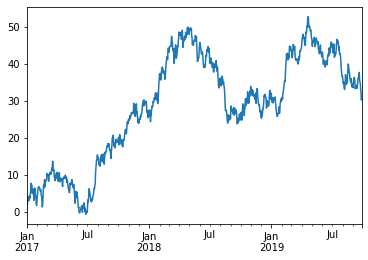

In [131]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2017', periods=1000))
ts = ts.cumsum()
%matplotlib inline
ts.plot()

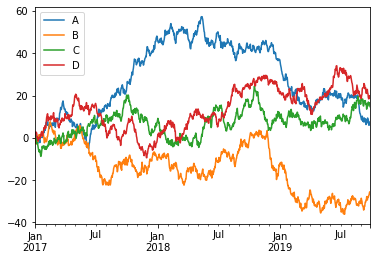

In [134]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=['A','B','C','D'])
df = df.cumsum()
%matplotlib inline
df.plot()
plt.legend(loc='best')